In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt


In [2]:
sdss_salt2_ug_obs = Table.read('./sdss_salt2_ri/sdss_salt2_ri.FITRES.TEXT',
                               format='ascii', header_start=1, data_start=2)

sdss_salt2_ri_obs = Table.read('./sdss_salt2_ug/sdss_salt2_ug.FITRES.TEXT',
                               format='ascii', header_start=1, data_start=2)

sdss_salt2_ugriz_obs = Table.read('./sdss_salt2_ri/sdss_salt2_ri.FITRES.TEXT',
                               format='ascii', header_start=1, data_start=2)


In [3]:
def show_save(*args, show=False, **kwargs):
    """Can either show or save a matplotlib figure
    
    Saves figure if show is false, otherwise calls plt.show() without saving.
    
    Args:
        Accepts the same arguments as matplotlib.pyplot.savefig
        show (bool): Calls plt.show()
    """

    if show:
        plt.show()
    
    else:
        plt.savefig(*args, **kwargs)
        plt.clf()
        

In [4]:
def cut_table(table):
    
    cut_table = table[table['x1'] < max(table['x1'])]
    cut_table = cut_table[cut_table['x1'] > min(cut_table['x1'])]
    cut_table = cut_table[cut_table['c'] < max(cut_table['c'])]
    cut_table = cut_table[cut_table['x1'] > min(cut_table['x1'])]
    
    return cut_table

def plot_stretch_v_color(*args, show=False, error=False, cut=False, **kwargs):
    
    plt.clf()
    
    fig = plt.figure(figsize=(15, 5))
    ax_ug = fig.add_subplot(1, 3, 1)
    ax_ri = fig.add_subplot(1, 3, 2)
    ax_ugriz = fig.add_subplot(1, 3, 3)
    
    ax_ug.set_ylabel('Color (c)')
    ax_ri.set_xlabel('Stretch (x1)')

    ug_table = cut_table(sdss_salt2_ug_obs) if cut else sdss_salt2_ug_obs
    ri_table = cut_table(sdss_salt2_ri_obs) if cut else sdss_salt2_ri_obs
    ugriz_table = cut_table(sdss_salt2_ugriz_obs) if cut else sdss_salt2_ugriz_obs
    
    if error:
        ax_ug.errorbar(ug_table['x1'], ug_table['c'],
                       ug_table['x1ERR'], ug_table['cERR'],
                       alpha=.1, fmt='.')
        
        ax_ri.errorbar(ri_table['x1'], ri_table['c'],
                       ri_table['x1ERR'], ri_table['cERR'],
                       alpha=.1, fmt='.')
        
        ax_ugriz.errorbar(ugriz_table['x1'], ugriz_table['c'],
                          ugriz_table['x1ERR'], ugriz_table['cERR'],
                          alpha=.1, fmt='.')
    
    ax_ug.scatter(ug_table['x1'], ug_table['c'], s=2)
    ax_ri.scatter(ri_table['x1'], ri_table['c'], s=2)
    ax_ugriz.scatter(ugriz_table['x1'], ugriz_table['c'], s=2)
    
    show_save(*args, show=show, **kwargs)
    

Color vs Stretch for SNe Ia


<Figure size 432x288 with 0 Axes>

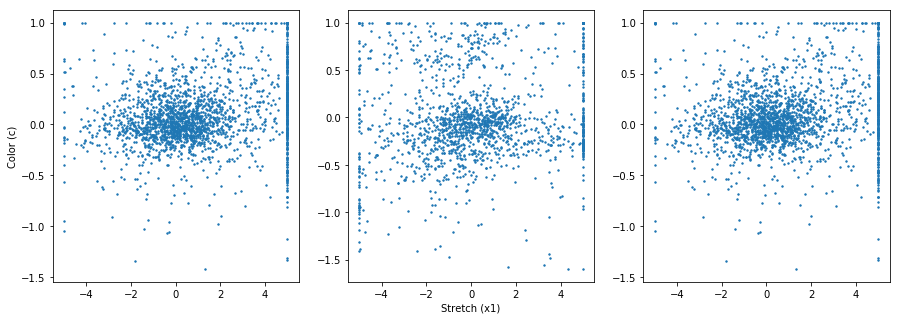

In [5]:
print('Color vs Stretch for SNe Ia')
plot_stretch_v_color(show=True)

Color vs Stretch for SNe Ia with Data Cuts


<Figure size 432x288 with 0 Axes>

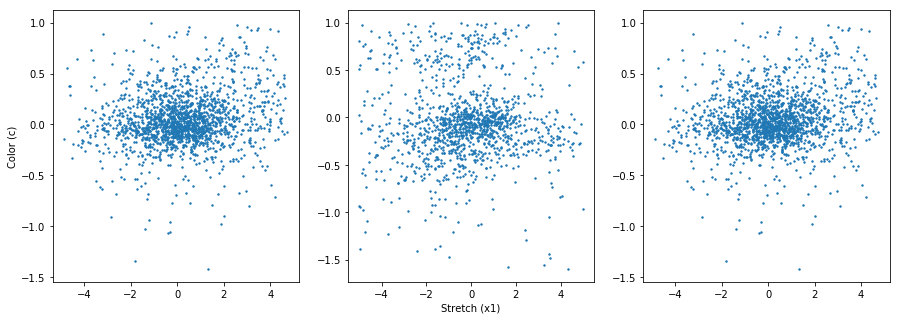

In [6]:
print('Color vs Stretch for SNe Ia with Data Cuts')
plot_stretch_v_color(show=True, cut=True)

Color vs Stretch for SNe Ia with Error Bars


<Figure size 432x288 with 0 Axes>

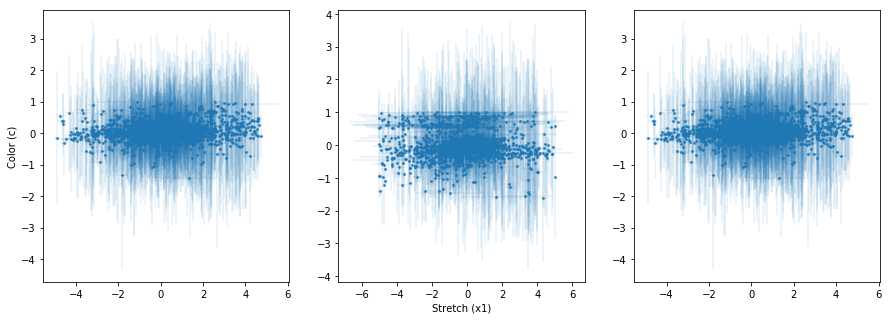

In [7]:
print('Color vs Stretch for SNe Ia with Error Bars')
plot_stretch_v_color(show=True, cut=True, error=True)